In [1]:
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
city_data = pd.read_csv("Resources/Collected_Pollution_Measurements.csv")
city_data.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [4]:
low_aqi = city_data.sort_values("aqi")

low_aqi.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
202129,2021-01-01 12:00:00,280.38,0.48,8.74,7.87,0.87,4.37,4.66,0.21,1.0,Matthews,0.998507,40.05,72164.0
161493,2021-01-10 06:00:00,353.81,0.09,21.08,23.25,1.12,9.65,11.41,3.17,1.0,Toledo,0.775815,36.60,133056.0
161494,2021-01-10 05:00:00,357.15,0.13,22.28,22.71,1.01,9.47,11.42,3.17,1.0,Toledo,0.775815,36.60,133056.0
161495,2021-01-10 04:00:00,360.49,0.17,22.28,22.89,0.94,9.41,11.60,3.14,1.0,Toledo,0.775815,36.60,133056.0
161496,2021-01-10 03:00:00,383.85,0.37,25.02,18.60,0.92,9.72,12.28,3.42,1.0,Toledo,0.775815,36.60,133056.0


In [6]:
low_aqi = low_aqi.loc[low_aqi["aqi"] == 1]
low_aqi.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
202129,2021-01-01 12:00:00,280.38,0.48,8.74,7.87,0.87,4.37,4.66,0.21,1.0,Matthews,0.998507,40.05,72164.0
161493,2021-01-10 06:00:00,353.81,0.09,21.08,23.25,1.12,9.65,11.41,3.17,1.0,Toledo,0.775815,36.60,133056.0
161494,2021-01-10 05:00:00,357.15,0.13,22.28,22.71,1.01,9.47,11.42,3.17,1.0,Toledo,0.775815,36.60,133056.0
161495,2021-01-10 04:00:00,360.49,0.17,22.28,22.89,0.94,9.41,11.60,3.14,1.0,Toledo,0.775815,36.60,133056.0
161496,2021-01-10 03:00:00,383.85,0.37,25.02,18.60,0.92,9.72,12.28,3.42,1.0,Toledo,0.775815,36.60,133056.0


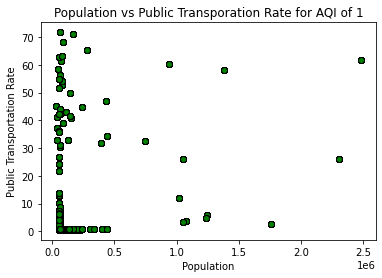

In [7]:
x = low_aqi["Population"]
y = low_aqi["Public Transportation Rate"]

plt.scatter(x, y, facecolors="green", edgecolors="black")

plt.xlabel("Population")
plt.ylabel("Public Transportation Rate")
plt.title("Population vs Public Transporation Rate for AQI of 1")
plt.show()

In [9]:
city_df = low_aqi.groupby(["City"])
population = city_df["Population"].mean()
aqi = city_df["aqi"].mean()

city_population_df = pd.DataFrame({"Population": population, "AQI" : aqi})

city_population_df

,Population,AQI
City,,
Abilene,57336.0,1.0
Aguadilla Pueblo,53162.0,1.0
Alpharetta,163810.0,1.0
Altoona,63235.0,1.0
Ames,58891.0,1.0
...,...,...
Woodside,88939.0,1.0
Woodville,75390.0,1.0
Yardley,51148.0,1.0


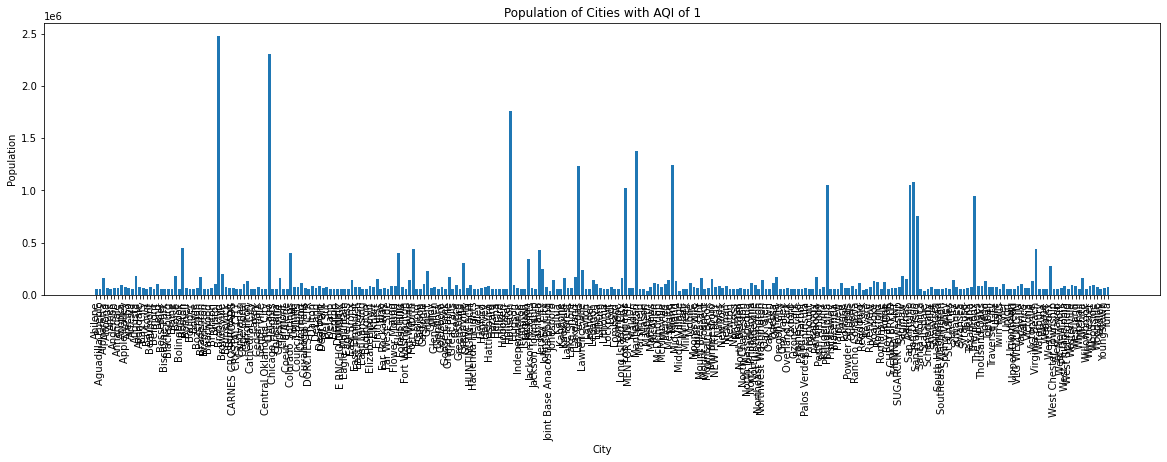

In [26]:
city = city_population_df.index
population = city_population_df["Population"]
plt.figure(figsize=(20, 5))
plt.xlabel("City")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.title("Population of Cities with AQI of 1")

plt.bar(city, population)
plt.show()

In [11]:
city

Index(['Abilene', 'Aguadilla Pueblo', 'Alpharetta', 'Altoona', 'Ames',
       'Anderson', 'Annandale', 'Apopka', 'Apple Valley', 'Arecibo',
       ...
       'Westland', 'Whitehall', 'Wichita', 'Willowbrook', 'Winchester',
       'Woodside', 'Woodville', 'Yardley', 'Youngstown', 'Yuma'],
      dtype='object', name='City', length=282)